# Exerice 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class ActivationFunction:
    def __init__(self, name, alpha=0.01):
        self.name = name.lower()
        self.alpha = alpha  # Pour Leaky ReLU

    def apply(self, z):
        if self.name == "heaviside":
            return np.where(z >= 0, 1, 0)
        elif self.name == "sigmoid":
            return 1 / (1 + np.exp(-z))
        elif self.name == "tanh":
            return np.tanh(z) # Utilisation de la fonction tanh de numpy 
        elif self.name == "relu":
            return np.where(z >= 0, z, 0)
        elif self.name == "leaky_relu":
            return np.where(z >= 0, z, self.alpha * z)
        else:
            raise ValueError(f"Activation '{self.name}' non reconnue.")

    def derivative(self, z):
        if self.name == "heaviside":
            return np.zeros_like(z)
        elif self.name == "sigmoid":
            sig = self.apply(z)
            return sig * (1 - sig)
        elif self.name == "tanh":
            tanh_z = self.apply(z)
            return 1 - tanh_z ** 2
        elif self.name == "relu":
            return np.where(z > 0, 1, 0)
        elif self.name == "leaky_relu":
            return np.where(z > 0, 1, self.alpha)
        else:
            raise ValueError(f"Dérivée de '{self.name}' non définie.")
        




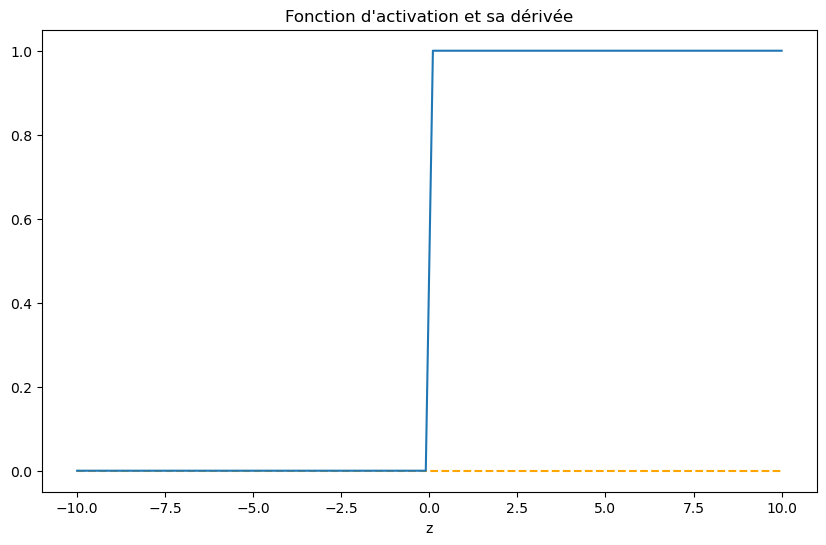

In [3]:
z = np.array([-5,0,4,3])
z = np.linspace(-10, 10, 100)
activation = ActivationFunction("heaviside", alpha=0.01)
derivative = activation.derivative(z)
plt.figure(figsize=(10, 6))
plt.plot(z, derivative, label='Dérivée de heaviside', linestyle='--', color='orange')
plt.title('Fonction d\'activation et sa dérivée')
plt.xlabel('z')
plt.plot(z, activation.apply(z), label='heaiside')


# Exerice 2


- **Pourquoi la fonction de Heaviside pose-t-elle problème pour l'apprentissage par gradient ?**  

    La fonction de Heaviside n'est pas différentiable et sa dérivée est nulle presque partout. Cela empêche la propagation du gradient lors de l'entraînement, rendant l'apprentissage impossible avec les méthodes de descente de gradient.

- **Dans quels cas utiliser sigmoid vs tanh ?**  

    - Sigmoid : Utilisée en sortie pour des probabilités (classification binaire), car elle produit des valeurs entre 0 et 1.  
    - Tanh : Préférée dans les couches cachées car elle est centrée en zéro (valeurs entre -1 et 1), ce qui facilite l'apprentissage et la convergence.

- **Pourquoi ReLU est-elle si populaire dans les réseaux profonds ?**  
    ReLU  est rapide à calculer, et permet d'atténuer le problème du gradient qui disparaît. Elle favorise une convergence plus rapide et permet d'entraîner des réseaux profonds efficacement.

- **Quel est l'avantage du leaky ReLU ?**  
    Le leaky ReLU permet un petit flux de gradient lorsque l'entrée est négative, ce qui évite le problème des neurones "morts" (neurones qui ne s'activent plus jamais) rencontré avec la ReLU standard.

# Excerice 3

- **Que se passe-t-il si $\eta$ est trop grand ?**  
    - Le perceptron peut osciller autour de la solution optimale sans jamais s’y stabiliser.
    - L’apprentissage devient instable, voire diverge si les mises à jour deviennent trop importantes
    - Il peut sauter au-dessus de la soluiton correcte sans jamais l’atteindre.
    

- **Et s’il est trop petit ?**  
    - Les mises à jour sont trop lentes, donc l’apprentissage est très long.
    - Le perceptron met beaucoup de temps à converger, ou peut rester bloqué prématurément dans une configuration sous-optimale si le nombre d’itérations est limité (pas envie d'avoir un programme avec des millions d'itérations).
    - Cependant, un petit $\eta$ assure souvent une meilleure stabilité et une convergence plus fine (en plus de permettre de faire une sieste entre chaque entrainement).

- **Existe-t-il une valeur idéale de $\eta$ ?**  
    Il n’existe pas de valeur universelle idéale. Typiquement, on choisit $\eta$ entre 0.01 et 0.2, mais la meilleure valeur dépend du problème et des données.


- **Peut-on faire varier $\eta$ au cours du temps ?**  
    Oui, on peut faire varier $\eta$ au cours du temps. Cela permet d'adapter la vitesse d'apprentissage en fonction de la phase d'entraînement. Par exemple, on peut commencer avec un $\eta$ plus élevé pour une convergence rapide, puis le diminuer pour affiner l'apprentissage.


- **Quelle stratégie pouvez-vous imaginer ?**  
    On peut réduire $\eta$ de plus en plu au file des itérations, par exemple en utilisant une stratégie de "learning rate decay" (décroissance du taux d'apprentissage). Cela permet de commencer avec un taux d'apprentissage plus élevé pour une convergence rapide, puis de le diminuer pour affiner la solution et éviter les oscillations autour de l'optimum.



# Exercice 4

In [4]:
class PerceptronSimple:
    def __init__(self, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None
        
    def fit(self, X, y, max_epochs=100):
        """
        Entraîne le perceptron
        X: matrice des entrées (n_samples, n_features)
        y: vecteur des sorties désirées (n_samples,)
        """
        n_samples, n_features = X.shape # Nombre d'échantillons et de caractéristiques
        self.weights = np.random.randn(n_features)
        self.bias = 0.0
        self.errors_ = [] # Liste pour stocker le nombre d'erreurs à chaque époque (pour l'exo 8)

        for e in tqdm(range(max_epochs), desc="Entraînement du perceptron"):
            errors = 0
            for b in range(n_samples):
                x = X[b]
                y_true = y[b]
                linear_output = np.dot(x, self.weights) + self.bias # fonction linéaire
                y_pred = 1 if linear_output >= 0 else 0  # Activation de Heaviside
                error = y_true - y_pred 
                if error != 0: # Si la prédiction est incorrecte alors on met à jour les poids et le biais
                    update = self.learning_rate * error
                    self.weights += update * x
                    self.bias += update
                    errors += 1
            self.errors_.append(errors)
        
    def predict(self, X):
        """Prédit les sorties pour les entrées X"""
        n_samples, n_features = X.shape
        y_pred = np.zeros(n_samples)
        for b in range(n_samples):
            linear_output = np.dot(X[b], self.weights) + self.bias # fonction linéaire
            y_pred[b] = 1 if linear_output >= 0 else 0 # Activation de Heaviside
        return y_pred
        
    def score(self, X, y):
        predictions = self.predict(X) # Prédictions du perceptron
        return np.mean(predictions == y)

X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])  # -1 pour False, 1 pour True

# Données pour la fonction OR
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

perceptron_and = PerceptronSimple(learning_rate=0.1)
perceptron_and.fit(X_and, y_and, max_epochs=100)
print("Précision du perceptron AND :", perceptron_and.score(X_and, y_and))
perceptron_or = PerceptronSimple(learning_rate=0.1)
perceptron_or.fit(X_or, y_or, max_epochs=100)
print("Précision du perceptron OR :", perceptron_or.score(X_or, y_or))




Entraînement du perceptron: 100%|██████████| 100/100 [00:00<00:00, 54168.98it/s]


Précision du perceptron AND : 1.0


Entraînement du perceptron: 100%|██████████| 100/100 [00:00<00:00, 16332.32it/s]

Précision du perceptron OR : 1.0


# Exercice 5

- **Combien d'époques sont nécessaires pour converger ?**  
  
Pour des poids initiaux aléatoires [ 2.11147873 -0.9591283 ], il a fallu 11 époques donc 18 échantillons traité pour converger. (Fonction AND)


- **Visualisez la droite de séparation trouvée**

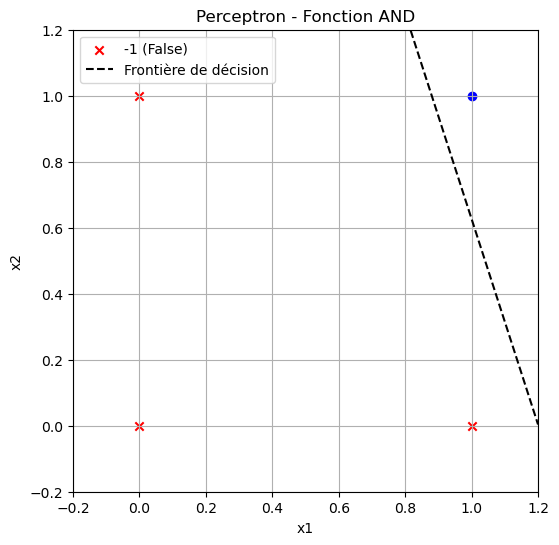

In [5]:
# Visualisation de la frontière de décision du perceptron entraîné sur AND
plt.figure(figsize=(6, 6))
for i, (x, y) in enumerate(zip(X_and, y_and)):
    if y == 1: # les points positifs (True) seront en bleu
        plt.scatter(x[0], x[1], color='blue', marker='o', label='1 (True)' if i == 0 else "")
    else: # les points négatifs (False) seront en rouge
        plt.scatter(x[0], x[1], color='red', marker='x', label='-1 (False)' if i == 0 else "")

# Calcul de la frontière de décision : w1*x1 + w2*x2 + b = 0 => x2 = -(w1*x1 + b)/w2
w = perceptron_and.weights
b = perceptron_and.bias
x_vals = np.linspace(-0.2, 1.2, 100) # Génération de valeurs x pour la frontière de décision
if w[1] != 0: # Éviter la division par zéro
    y_vals = -(w[0] * x_vals + b) / w[1] # Calcul de y en fonction de x
    plt.plot(x_vals, y_vals, 'k--', label='Frontière de décision') # Ligne de séparation
else: # Si w[1] est zéro, la frontière de décision est verticale
    plt.axvline(-b / w[0], color='k', linestyle='--', label='Frontière de décision')

plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron - Fonction AND')

plt.legend()
plt.grid(True)
plt.show()

- **Le perceptron converge-t-il toujours vers la même solution ? (ie les mêmes poids)**  
  
Si on prend des poids identiques, on obtient belle et bien la même solution

# Exercice 6

Entraînement du perceptron: 100%|██████████| 100/100 [00:00<00:00, 32793.62it/s]

0.5


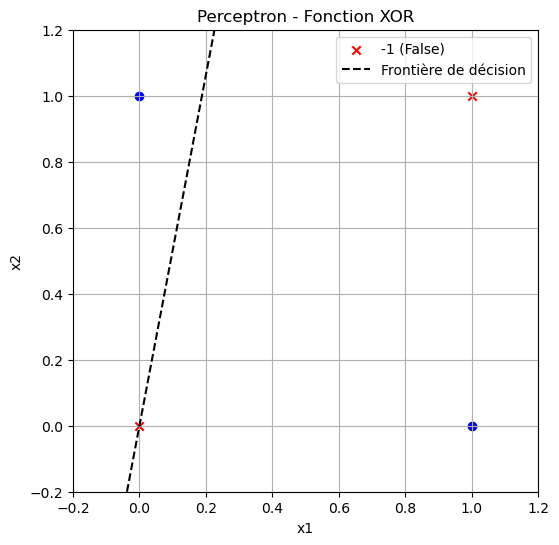

In [40]:
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

perceptron_xor = PerceptronSimple(learning_rate=0.1)
perceptron_xor.fit(X_xor, y_xor)
print(perceptron_xor.score(X_xor, y_xor))


# Visualisation de la frontière de décision du perceptron entraîné sur XOR
plt.figure(figsize=(6, 6))
for i, (x, y) in enumerate(zip(X_xor, y_xor)):
    if y == 1: # les points positifs (True) seront en bleu
        plt.scatter(x[0], x[1], color='blue', marker='o', label='1 (True)' if i == 0 else "")
    else: # les points négatifs (False) seront en rouge
        plt.scatter(x[0], x[1], color='red', marker='x', label='-1 (False)' if i == 0 else "")

w = perceptron_xor.weights
b = perceptron_xor.bias
x_vals = np.linspace(-0.2, 1.2, 100)
if w[1] != 0:
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, 'k--', label='Frontière de décision')
else:
    plt.axvline(-b / w[0], color='k', linestyle='--', label='Frontière de décision')

plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron - Fonction XOR')
plt.legend()
plt.grid(True)
plt.show()


- **Quelles sont vos constatations ?**  
  
    il n'est pas possible de séparer les classes avec une droite, donc le perceptron ne converge pas.
- **Quel lien peut-on faire avec la notion de séparabilité linéaire évoquée plus tôt dans le cours ?**  
  
    La notion de séparabilité linéaire indique que pour qu'un perceptron converge, les classes doivent être séparables par une droite. Dans ce cas, les classes ne le sont pas, donc le perceptron ne peut pas trouver de solution. Pour résoudre le problème du XOR, il faudrait un réseau de neurones plus complexe avec au moins une couche cachée.

# Exercice 7

Entraînement du perceptron: 100%|██████████| 100/100 [00:00<00:00, 2439.84it/s]


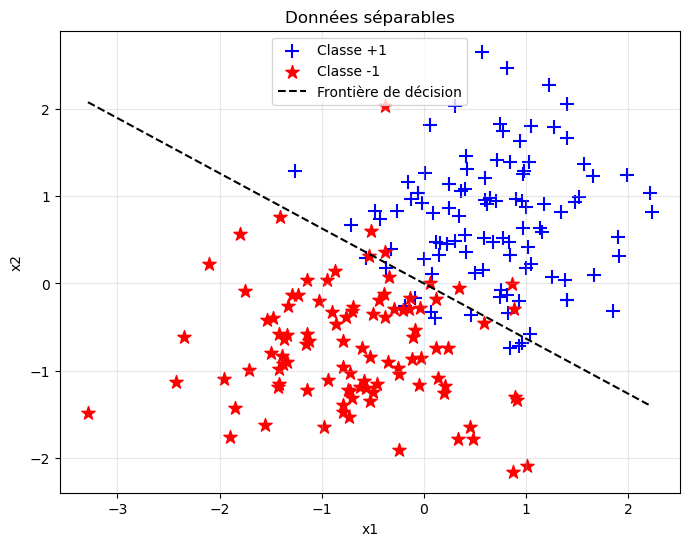

In [25]:
def generer_donnees_separables(n_points=100, noise=0.1):
    """
    Génère deux classes de points linéairement séparables
    """
    np.random.seed(42) # Pour pouivoir comparer les résultats


    X1 = np.random.randn(n_points // 2, 2)*noise + np.array([2, 2]) # Classe 1
    X2 = np.random.randn(n_points // 2, 2)*noise + np.array([-2, -2]) # Classe 2
    X = np.vstack((X1, X2)) # Combiner les deux classes
    y1 = np.ones(n_points // 2)  # Classe 1
    y2 = np.zeros(n_points // 2)  # Classe 2
    y = np.hstack((y1, y2)) # Combiner les étiquettes


    # Mélanger les données
    indices = np.random.permutation(n_points)
    X = X[indices]
    y = y[indices]


    # Normaliser les données
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return X, y




# Fonction du prof
def visualiser_donnees(X, y, w=None, b=None, title="Données"):
    """
    Visualise les données et optionnellement la droite de séparation
    """
    plt.figure(figsize=(8, 6))
    # Afficher les points
    mask_pos = (y == 1)
    plt.scatter(X[mask_pos, 0], X[mask_pos, 1], c='blue', marker='+', s=100, label='Classe +1')
    plt.scatter(X[~mask_pos, 0], X[~mask_pos, 1], c='red', marker='*', s=100, label='Classe -1')
    # Afficher la droite de séparation si fournie
    if w is not None and b is not None:
        # TODO: Tracer la droite w·x + b = 0
        x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
        y_vals = -(w[0] * x_vals + b) / w[1]
        plt.plot(x_vals, y_vals, 'k--', label='Frontière de décision')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.show()



# Générer des données séparables
X, y = generer_donnees_separables(n_points=200, noise=2.0) # le bruit est à 2 car le problème est très simple à séparer pour le perceptron
# Entraîner le perceptron sur les données générées
perceptron = PerceptronSimple(learning_rate=0.1)
perceptron.fit(X, y)
# Visualiser les données
visualiser_donnees(X, y, title="Données séparables", w=perceptron.weights, b=perceptron.bias)

# Exerice 8

Entraînement du perceptron: 100%|██████████| 100/100 [00:00<00:00, 3153.26it/s]


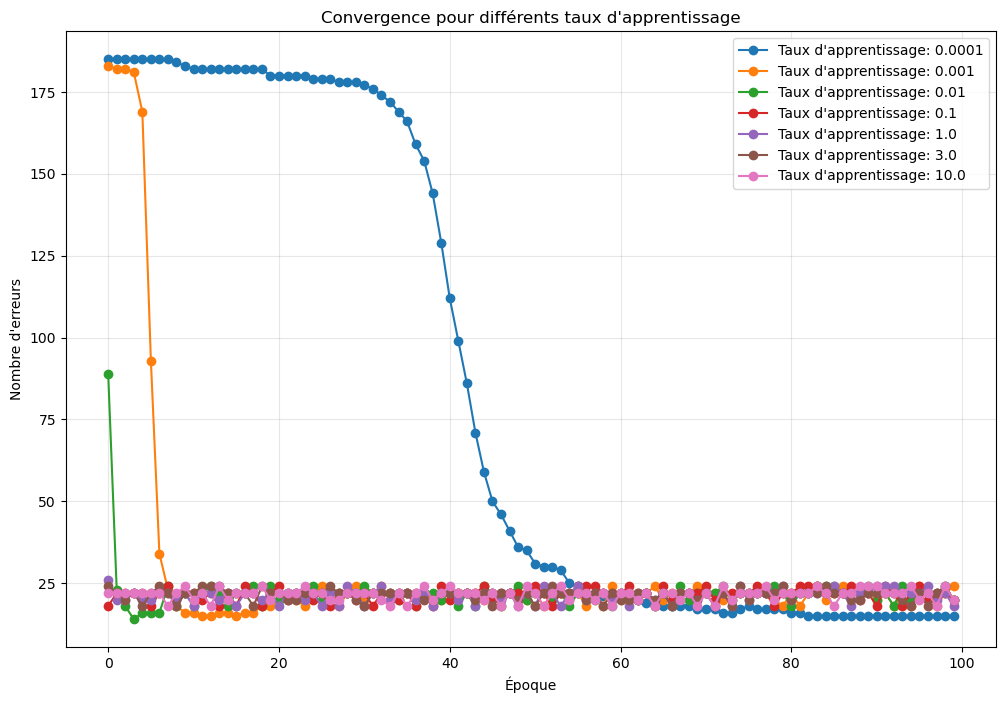

In [24]:
def analyser_convergence(X, y, learning_rates=[0.0001, 0.001, 0.01, 0.1, 1.0, 3.0, 10.0]):
    """
    Analyse la convergence pour différents taux d'apprentissage
    """
    plt.figure(figsize=(12, 8))
    for i, lr in enumerate(learning_rates):
        perceptron = PerceptronSimple(learning_rate=lr)
        perceptron.fit(X, y)

        plt.plot(perceptron.errors_, label=f"Taux d'apprentissage: {lr}", linestyle='-', marker='o')
        # TODO: Tracer les courbes de convergence
        pass
    plt.xlabel('Époque')
    plt.ylabel("Nombre d'erreurs")
    plt.title("Convergence pour différents taux d'apprentissage")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


# Analyser la convergence pour différents taux d'apprentissage
X, y = generer_donnees_separables(n_points=200, noise=2.0)
analyser_convergence(X, y)


-**Quel comportement observez-vous lorsque le taux d'apprentissage est très petit ?**  

Lorsque le taux d'apprentissage est très petit, le perceptron converge lentement vers une solution optimale. Les mises à jour des poids sont minimes, ce qui rend l'apprentissage très long et peut conduire à un blocage dans une configuration sous-optimale. Dnas mon cas on voit que 0.0001 et 0.001 sont idéals, on voit bien qu'il converge vers une solution optimale, mais il faut beaucoup d'itérations pour y arriver.


-**Que se passe-t-il lorsque le taux d'apprentissage est trop grand ?**

Lorsque le taux d'apprentissage est trop grand, le perceptron oscille autour de la solution optimale sans jamais s'y stabiliser. On peut le voir à partir de 0.1 et plus, où le perceptron oscille sans jamais converger vers une solution optimale.


-**Existe-t-il un taux d'apprentissage optimal dans votre cas ?**

Oui, dans mon cas, le taux d'apprentissage optimal semble être 0.001, car il permet une convergence rapide et stable vers la solution optimale sans être trop petit


-**Comment la structure des données (dispersion, bruit…) peut-elle interagir avec le taux d'apprentissage**

Si le bruit est trop grand, la dispersion peut devenir trop importante et les données se mélanger entre elle.

# Exerice 9

In [9]:
import numpy as np
from tqdm import tqdm

class PerceptronMultiClasse:
    def __init__(self, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.perceptrons = {}
        self.classes = None

    def fit(self, X, y, max_epochs=100):
        """
        Entraîne un perceptron par classe (stratégie un-contre-tous)
        """
        self.classes = np.unique(y)

        for classe in tqdm(self.classes, desc="Entraînement des perceptrons"):
            # TODO: Créer un problème binaire pour cette classe
            # Transformer y en problème binaire : classe courante vs toutes les autres
            y_binary = np.where(y == classe, 1, 0)
            

            # TODO: Entraîner un perceptron pour ce problème binaire
            perceptron = PerceptronSimple(learning_rate=self.learning_rate)
            perceptron.fit(X, y_binary, max_epochs)

            # Stocker le perceptron entraîné
            self.perceptrons[classe] = perceptron

    def predict(self, X):
        """Prédit en utilisant le vote des perceptrons"""
        if not self.perceptrons:
            raise ValueError("Le modèle n'a pas été entraîné. Appelez fit() d'abord.")

        # TODO: Calculer les scores de tous les perceptrons
        scores = np.zeros((X.shape[0], len(self.classes)))

        for i, classe in enumerate(self.classes):
            # Calculer la sommation pondérée (avant fonction d'activation)
            # pour obtenir un score de confiance
            perceptron = self.perceptrons[classe]
            raw_scores = X.dot(perceptron.weights) + perceptron.bias
            scores[:, i] = raw_scores

        # TODO: Retourner la classe avec le score maximum
        predicted_indices = np.argmax(scores, axis=1)
        return self.classes[predicted_indices]

    def predict_proba(self, X):
        """Retourne les scores de confiance pour chaque classe"""
        if not self.perceptrons:
            raise ValueError("Le modèle n'a pas été entraîné.")

        scores = np.zeros((X.shape[0], len(self.classes)))

        for i, classe in enumerate(self.classes):
            perceptron = self.perceptrons[classe]
            raw_scores = X.dot(perceptron.weights) + perceptron.bias
            scores[:, i] = raw_scores

        return scores

-**Cohérence des prédictions : Que se passe-t-il si plusieurs perceptrons prédisent positivement pour le même exemple ?**  
    Lorsqu'un exemple est prédit positivement par plusieurs perceptrons, il n'y a pas de conflit direct dans les prédictions. Cependant, cela peut poser des problèmes d'interprétation si l'on cherche à identifier la classe prédite.

-**Gestion des ambiguïtés : Comment gérer le cas où aucun perceptron ne prédit positivement ?**  
    Si aucun perceptron ne prédit positivement, cela signifie que l'exemple n'appartient à aucune des classes cibles. Dans ce cas, on peut soit le classer comme "inconnu", soit utiliser une approche probabiliste pour attribuer une classe basée sur les scores des perceptrons.
    
-**Équilibrage : Comment l'approche "Un contre Tous" gère-t-elle le déséquilibre naturel qu'elle crée ?**  
    L'approche "Un contre Tous" peut exacerber le déséquilibre si certaines classes sont beaucoup plus fréquentes que d'autres. Pour atténuer ce problème, on peut utiliser des techniques de rééchantillonnage (oversampling/undersampling) ou ajuster les poids des classes dans la fonction de perte pour donner plus d'importance aux classes minoritaires.

# Exercice 10

Données binaires : 100 échantillons, 2 features
Données complètes : 150 échantillons, 3 classes


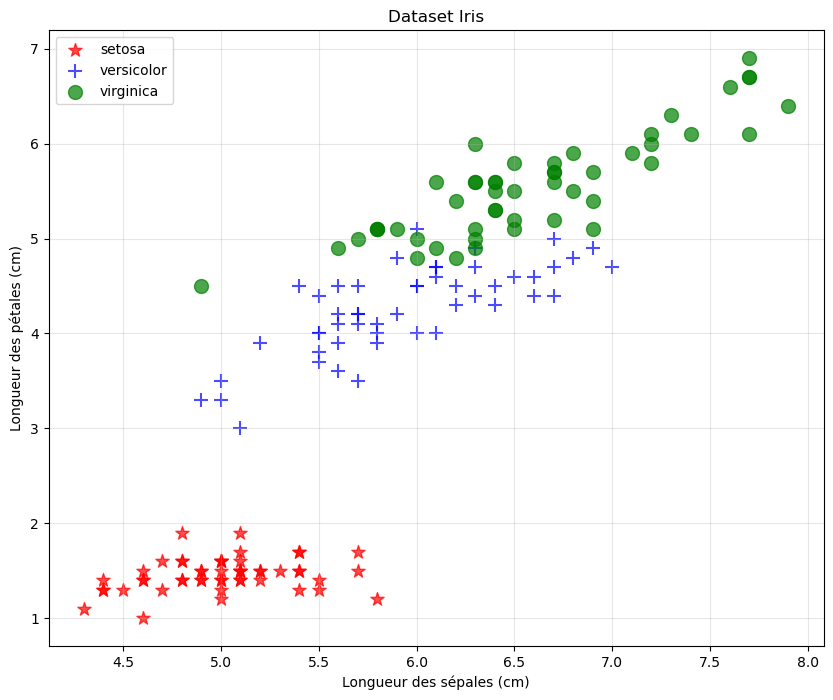

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def charger_donnees_iris_binaire():
    """
    Charge le dataset Iris en version binaire (2 classes) pour commencer
    """
    # Chargement du dataset Iris
    iris = load_iris()

    # Ne garder que 2 features pour la visualisation
    X = iris.data[:, [0, 2]]  # longueur des sépales et longueur des pétales
    y = iris.target

    # Ne garder que 2 classes pour commencer (Setosa vs Versicolor)
    mask = y < 2
    X_binary = X[mask]
    y_binary = y[mask]
    y_binary = 2 * y_binary - 1  # Convertir 0,1 en -1,1

    return X_binary, y_binary

def charger_donnees_iris_complete():
    """
    Charge le dataset Iris complet avec les 3 classes
    """
    iris = load_iris()
    X = iris.data[:, [0, 2]]  # longueur des sépales et longueur des pétales
    y = iris.target

    return X, y, iris.target_names

def visualiser_iris(X, y, target_names=None, title="Dataset Iris"):
    """
    Visualise le dataset Iris avec ses différentes classes
    """
    plt.figure(figsize=(10, 8))

    # Couleurs pour chaque classe
    colors = ['red', 'blue', 'green']
    markers = ['*', '+', 'o']

    for i in range(len(np.unique(y))):
        mask = (y == i)
        label = target_names[i] if target_names is not None else f'Classe {i}'
        plt.scatter(X[mask, 0], X[mask, 1], 
                   c=colors[i], marker=markers[i], s=100, 
                   label=label, alpha=0.7)

    plt.xlabel('Longueur des sépales (cm)')
    plt.ylabel('Longueur des pétales (cm)')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Test de la fonction
if __name__ == "__main__":
    # Version binaire d'abord
    X_bin, y_bin = charger_donnees_iris_binaire()
    print(f"Données binaires : {X_bin.shape[0]} échantillons, {X_bin.shape[1]} features")

    # Version complète
    X_full, y_full, noms = charger_donnees_iris_complete()
    print(f"Données complètes : {X_full.shape[0]} échantillons, {len(np.unique(y_full))} classes")

    # Visualisation
    visualiser_iris(X_full, y_full, noms)

# Exercice 11

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def evaluer_perceptron_multiclasse(X, y, target_names=None, test_size=0.3, val_size=0.5):
    """
    Évalue le perceptron multi-classes avec une méthodologie rigoureuse
    """

    # TODO: Diviser les données en train/validation/test
    # Première division : train+val / test
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    # Deuxième division : train / validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_size, random_state=42, stratify=y_temp
    )

    print(f"Répartition des données :")
    print(f"  - Entraînement : {X_train.shape[0]} échantillons")
    print(f"  - Validation   : {X_val.shape[0]} échantillons") 
    print(f"  - Test         : {X_test.shape[0]} échantillons")

    # TODO: Entraîner le perceptron multi-classes
    perceptron_mc = PerceptronMultiClasse(learning_rate=0.1)
    perceptron_mc.fit(X_train, y_train, max_epochs=100)

    # L'ensemble de validation devrait être passé en paramètre de la fonction fit.
    # Ainsi, à chaque epoch, vous pourrez tester les paramètres du modèle sur cet ensemble.
    # À la fin de l'apprentissage, ...pprentissage, on restaure les paramètres dont le fit est le meilleur sur l'enssemble de validation

    # TODO: Calculer les prédictions sur tous les ensembles
    y_train_pred = perceptron_mc.predict(X_train)
    y_val_pred = perceptron_mc.predict(X_val)
    y_test_pred = perceptron_mc.predict(X_test)

    # TODO: Calculer les métriques (accuracy, matrice de confusion)
    accuracy_train = np.mean(y_train_pred == y_train)
    accuracy_val = np.mean(y_val_pred == y_val)
    accuracy_test = np.mean(y_test_pred == y_test)

    print(f"\nPerformances :")
    print(f"  - Accuracy train      : {accuracy_train:.3f}")
    print(f"  - Accuracy validation : {accuracy_val:.3f}")
    print(f"  - Accuracy test       : {accuracy_test:.3f}")




# Exemple d'utilisation avec le dataset Iris complet
X, y, target_names = charger_donnees_iris_complete()
evaluer_perceptron_multiclasse(X, y, target_names=target_names)

Répartition des données :
  - Entraînement : 52 échantillons
  - Validation   : 53 échantillons
  - Test         : 45 échantillons


Entraînement des perceptrons: 100%|██████████| 3/3 [00:00<00:00, 35.96it/s]


Performances :
  - Accuracy train      : 0.846
  - Accuracy validation : 0.755
  - Accuracy test       : 0.778


-**Convergence : Dans quelles conditions le perceptron est-il garanti de converger ?**  
    Le perceptron est garanti de converger si les données sont linéairement séparables. Cela signifie qu'il existe une hyperplan qui peut séparer les classes cibles sans erreur. Si les données ne sont pas séparables, le perceptron peut ne pas converger ou converger vers une solution sous-optimale.

-**Initialisation : L'initialisation des poids influence-t-elle la solution finale ?**  
    Oui, l'initialisation des poids peut influencer la solution finale, surtout si les données ne sont pas linéairement séparables. Une mauvaise initialisation peut conduire à une convergence vers un minimum local ou à une oscillation autour de la solution optimale. Cependant, si les données sont linéairement séparables, l'initialisation n'affecte pas la convergence vers la solution optimale.

-**Taux d'apprentissage : Comment choisir le taux d'apprentissage optimal ?**
    Il faut choisir un taux d'apprentissage qui permet une convergence rapide sans provoquer d'oscillations ou de divergence. On peut le faire varier au cours des itérations, en commençant par un taux plus élevé et en le réduisant progressivement (par exemple, en utilisant une stratégie de "learning rate decay").

-**Généralisation : Comment évaluer la capacité de généralisation du perceptron ?**
    On peut évaluer la capacité de généralisation du perceptron en utilisant une validation croisée. Cela consiste à diviser les données en plusieurs sous-ensembles, à entraîner le perceptron sur certains d'entre eux et à tester sa performance sur les autres. On peut également utiliser des métriques comme l'accuracy, la précision, le rappel et le F1-score pour évaluer la performance du modèle sur des données non vues.

-**XOR Revisité : Proposez des solutions pour résoudre le problème XOR**
    On pourrait changer le problème du XOR en une fonction linéaire simple.

-**Données bruitées : Comment le perceptron se comporte-t-il avec des données bruitées ?**
    Si le bruit est légé et que les données sont séparables linéairement, le perceptron peut toujours converger vers une solution optimale. Cependant si le bruit est trop important, le perceptron ne pourra pas trouver de solution optimale pour séparer les classes distinctement mais une solution "au mieux"

-**Classes déséquilibrées : Que se passe-t-il si une classe est très minoritaire**  
    Si une classe est très minoritaire, le perceptron peut avoir du mal à apprendre à la reconnaître. Il peut converger vers une solution qui favorise les classes majoritaires, entraînant un biais dans les prédictions. Pour atténuer ce problème, on peut utiliser des techniques de rééchantillonnage ou ajuster les poids des classes dans la fonction de perte.

-**Normalisation : Faut-il normaliser les données avant l'entraînement ?**
    Oui, il faut normaliser les données avant l'entrainement sinon les poids peuvent être trop grands ou trop petits, ce qui peut ralentir la convergence ou empêcher le perceptron de trouver une solution optimale. La normalisation permet de mettre toutes les caractéristiques sur une échelle similaire, facilitant ainsi l'apprentissage.